In [55]:
# Import modules for future uses
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [56]:
# read train.csv as training data
train_data = pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/train.csv")
# use head() to get the top of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# read test.csv as testing data
test_data = pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/test.csv")
# use head() to get the top of the data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
# Check data to find any data missing (NaN)

# Use df.describe to show descriptive stat for NUMERICAL VAR ONLY
# use include=all to show CATEGORICAL VAR too
train_data.describe(include='all')
# Found NaNs in Age, Name, Ticket, Cabin, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [59]:
# Handle missing/ duplicate data

# Count all null values using df.isnull().sum()
print('\nNull values in training data: \n{0}'.format(train_data.isnull().sum()))
# Found Null values in Age(177), Cabin (687) and Embarked (2)
print('\nNull values in testing data:  \n{0}'.format(test_data.isnull().sum()))
# Found Null values in Age(86), Fare(1), Cabin (327)

# Count all duplicated values using df.duplicated().sum()
print('\nDuplicated Values in training data {0}'.format(train_data.duplicated().sum()))
print('Duplicated values in testing data {0}'.format(test_data.duplicated().sum()))
# Found No duplicate data below


Null values in training data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values in testing data:  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated Values in training data 0
Duplicated values in testing data 0


In [60]:
# Filling Data to make it complete

# 1. Fill Embarked in training by using the most common port of embarkment ()
# Find the most common port in training data
# Use the df[column name].value_counts() to show the counts of each value in col
# Then use .idxmax() to return the mode (most common) value
mode=train_data["Embarked"].value_counts().idxmax()

# Replace null with the mode value using df[Column name].fillna
# MAKE SURE use the argument inplace=True to make sure the replacement is done on current dataFrame
# Otherwise it will make a copy of dataframe (which you can assign it)
train_data["Embarked"].fillna(mode, inplace=True)

# check whether null values exist (for testing)
# print(train_data["Embarked"].isnull().sum()==0)

# 2. Fill Fare with the average value of all fares
# Find the average fare value in testing data
# Use the df[column name].mean to show the mean of all values in a col
average=test_data["Fare"].mean()

# Just like above
test_data["Fare"].fillna(average,inplace=True)

# checking incase
# print(test_data["Fare"].isnull().sum()==0)

# 3. Fill Age
# First find the average age for each name title, then put mean age back to missing data based on its name title

# 3.1 Find mean age for each name title
# find values in column A based on a conidition in column B:
# df[conidition on B][column A]
# use mean() to find average and round() to make sure it's whole #

mean_age_mr=train_data[train_data["Name"].str.contains('Mr.', na=False)]["Age"].mean().round()
mean_age_mrs=train_data[train_data["Name"].str.contains('Mrs.', na=False)]["Age"].mean().round()
mean_age_miss=train_data[train_data["Name"].str.contains('Miss.', na=False)]["Age"].mean().round()
mean_age_master=train_data[train_data["Name"].str.contains('Master.', na=False)]["Age"].mean().round()
mean_age_dr=train_data[train_data["Name"].str.contains('Dr.', na=False)]["Age"].mean().round()

# Rest filled with non NaN values
mean_age_rev=train_data[train_data["Name"].str.contains('Rev.', na=False)]["Age"].mean().round()
mean_age_mme=train_data[train_data["Name"].str.contains('Mme.', na=False)]["Age"].mean().round()
mean_age_major=train_data[train_data["Name"].str.contains('Major.', na=False)]["Age"].mean().round()
mean_age_lady=train_data[train_data["Name"].str.contains('Lady.', na=False)]["Age"].mean().round()
mean_age_sir=train_data[train_data["Name"].str.contains('Sir.', na=False)]["Age"].mean().round()
mean_age_col=train_data[train_data["Name"].str.contains('Col.', na=False)]["Age"].mean().round()
mean_age_mlle=train_data[train_data["Name"].str.contains('Mlle.', na=False)]["Age"].mean().round()
mean_age_capt=train_data[train_data["Name"].str.contains('Capt.', na=False)]["Age"].mean().round()
mean_age_countess=train_data[train_data["Name"].str.contains('Countess.', na=False)]["Age"].mean().round()

# replace empty age with the mean age based on name title

# print(train_data["Age"].isnull().sum()) # 177

# function to replace values from NaN with means
title_list=['Mrs.','Miss.', 'Mr.', 'Master.', 'Dr.']
mean_list=[mean_age_mrs, mean_age_miss, mean_age_mr, mean_age_master, mean_age_dr]

for i in range(len(title_list)):
    train_data.loc[train_data["Name"].str.contains(title_list[i], na=False) & train_data["Age"].isna(),"Age"]=mean_list[i]

# print(train_data["Age"].isnull().sum()) # 0

# 4. Actually Fill Cabin

# Fill cabin by check their fare to guess their cabin

# print mean fare for each cabin

# mean_fare_cabin_a=train_data[train_data["Cabin"]=='A']["Fare"].mean() # left wasted due to no correlation
mean_fare_cabin_b=train_data[train_data["Cabin"]=='B']["Fare"].mean()
mean_fare_cabin_c=train_data[train_data["Cabin"]=='C']["Fare"].mean()
mean_fare_cabin_d=train_data[train_data["Cabin"]=='D']["Fare"].mean()
mean_fare_cabin_e=train_data[train_data["Cabin"]=='E']["Fare"].mean()
mean_fare_cabin_f=train_data[train_data["Cabin"]=='F']["Fare"].mean()
mean_fare_cabin_g=train_data[train_data["Cabin"]=='G']["Fare"].mean()

# assign cabin base on fares, replace all unknown fare 

# print(train_data.loc[(train_data["Cabin"]=='X')]["Cabin"].value_counts().to_dict())
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]>=mean_fare_cabin_b), "Cabin"]="B"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_b) & (train_data["Fare"]>=mean_fare_cabin_c), "Cabin"]="C"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_c) & (train_data["Fare"]>=mean_fare_cabin_d), "Cabin"]="D"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_d) & (train_data["Fare"]>=mean_fare_cabin_e), "Cabin"]="E"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_e) & (train_data["Fare"]>=mean_fare_cabin_f), "Cabin"]="F"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_f) & (train_data["Fare"]>=mean_fare_cabin_g), "Cabin"]="G"

# print(train_data[(train_data["Cabin"]=='X')&train_data["Fare"]>mean_fare_cabin_g]) # Empty data frame check to ensure all fare above the mean of cabin G has assigned to a new cabin



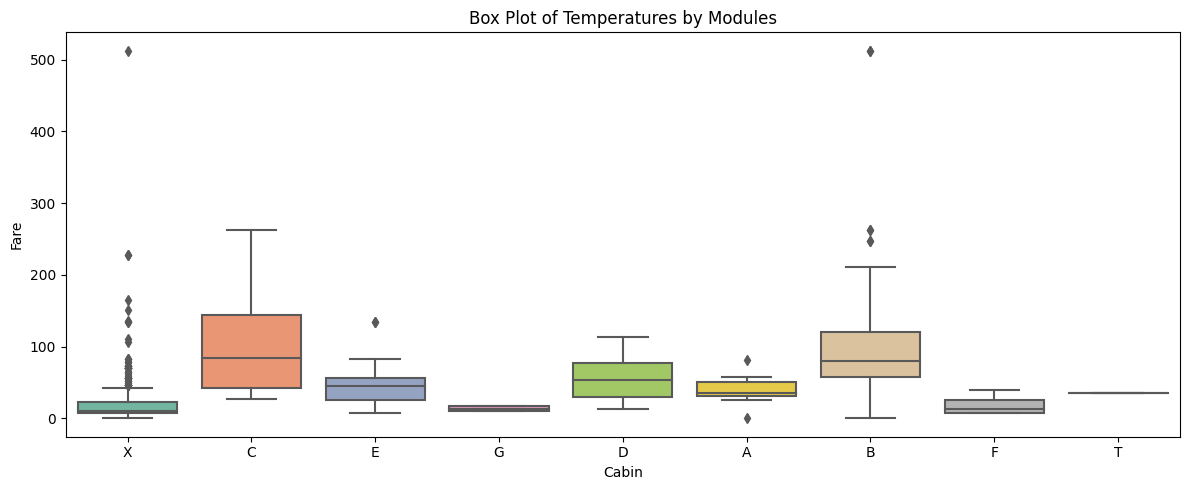

In [61]:
# How to Fill Cabin (supplementry): 

import seaborn as sns
import matplotlib.pyplot as plt

# a. first group the unknown data into a group
# for known data, keep the first character
# Then display using seaborn's boxplot

# Training and testing data
train_data["Cabin"]=pd.Series('X'if pd.isnull(each) else each[0] for each in train_data["Cabin"])
test_data["Cabin"]=pd.Series('X'if pd.isnull(each) else each[0] for each in test_data["Cabin"])

# Plot Cabin data with fare to check how the unknown usually belong
plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

# Result shows most from the unknown class (X) has a low fare
        
        

In [62]:
# Check entire dataset to make sure to null value

train_data.isnull().sum()
# Return 0 for every column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [63]:
# pd.loc to access data in array based on given column(s)
# Find female survivors in training data
women = train_data.loc[train_data.Sex == 'female']["Survived"]
# Find the rate of survived women by adding the (0/1) then divide the amount of women
rate_women = sum(women)/len(women)

# Print the percentage of women
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [64]:
# pd.loc to access data in array based on given column(s)
# Find male survivors in training data
men = train_data.loc[train_data.Sex == 'male']["Survived"]
# Find the rate of survived women by adding the (0/1) then divide the amount of women
rate_men = sum(men)/len(men)

# Print the percentage of women
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [65]:
# TEST: trying to find age's correlation with survival rate
priority = train_data.loc[(train_data.Age <=15)| (train_data.Age>=70)]["Survived"]
# Find the rate of survived women by adding the (0/1) then divide the amount of women
rate_priority = sum(priority)/len(priority)

# Print the percentage of women
print("% of youth and old who survived:", rate_priority)

% of youth and old who survived: 0.5531914893617021


In [66]:
# TEST: trying to find passenger classes' correlation with survival rate
pclass = train_data.loc[train_data.Pclass==3]["Survived"]
# Find the rate of survived women by adding the (0/1) then divide the amount of women
rate_pclass = sum(pclass)/len(pclass)

# Print the percentage of women
print("% of first class passengers who survived:", rate_pclass)
# % of 1st class passengers who survived: 0.6296296296296297
# % of 2nd class passengers who survived: 0.47282608695652173
# % of 3rd class passengers who survived: 0.24236252545824846

% of first class passengers who survived: 0.24236252545824846


In [67]:
# TEST: trying to find fare's correlation with survival rate
fare = train_data.loc[train_data.Fare>100]["Survived"]
# Find the rate of survived women by adding the (0/1) then divide the amount of women
rate_fare = sum(fare)/len(fare)

# Print the percentage of fare
print("% of passengers whose fare >100 who survived:", rate_fare)
# % of passengers whose fare >100 who survived: 0.7358490566037735

% of passengers whose fare >100 who survived: 0.7358490566037735


In [68]:
# Implementing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# assign y to the survived passengers in training data
y = train_data["Survived"]

# Build trees based on the features selected
# features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
features = ["Sex", "Fare"]
# Assign X/X_test to the numerical variables from the training/testing data
# Use pd.get_dummies to convert categorical variable to a numerical one
X = pd.get_dummies(train_data[features])

X_test = pd.get_dummies(test_data[features])
X_test['Fare'] = X_test['Fare'].fillna(0)


# Implement random forest classifier with argument
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Original model: 0.785
# model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1) 

# Hyperparamter Tuning: 
# Optimized Model 1: gini criterion, 1000 DEPTH, rest untouched: ~0.76-0.77
# Optimized Model 2: gini criterion, 10000 DEPTH, rest untouched: ~0.77
# Optimized Model 3: gini criterion, 10 DEPTH, n_estimators=10000, rest untouched: ~0.78
# Optimized Model 4: gini criterion, 1000 DEPTH, n_estimators=10000, rest untouched: ~0.78
# Optimized Model 5: gini criterion, n_estimators=1000000, rest untouched: ~0.78
# Optimized Model 6: gini criterion, n_estimators=1000, rest untouched: ~0.76, class_weight adjusted in which survivor is weighted heavier
# Optimized Model 7: gini criterion, n_estimators=1000, rest untouched: ~0.76, class_weight adjusted in balance
# Optimized Model 8: featues become only Sex and Fare, rest untouched: ~0.76


# dict_weights = {1:2, 0: 1, 2:1, 3:1, 4:1}
# dict_weights = {"Pclass":1, "Sex": 1, "SibSp": 1, "Parch": 1, "Fare": 1}

optimized_model = RandomForestClassifier(n_estimators=10000, criterion= "gini", max_features=None, bootstrap=True)

# TRY to fit the model
optimized_model.fit(X, y)
# use model.predict to save the model's predictions
predictions = optimized_model.predict(X_test)

# Assign output (418x2) to a dataframe
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Decision Tree parameter (learned from sklearn):

criterion: Function to measure split {“gini”, “entropy”, “log_loss”}

splitter: strat to split each node, best for best split; random for best random split {“best”, “random”}

max_depth: tree max dept, usually none

min_samples_split: min # of samples to split, usually 1

min_samples_leaf: min # of samples to be a leaf, usually 1

min_weight_fraction_leaf: min weight fraction of the sum of all weights to be a leaf node

max_feature: # of features to consider when look at best split, usually int, RandomState instance or None, default=None

random_state: randomness of the estimator, usually nt, RandomState instance or None, default=None, used because when max_features<=nfeatures algo always select max_features

max_leaf_nodes: usually int or default None aka unlimited

min_impurity_decrease: node splits if this split induce an impunity larger than given value

class_weight: weighting of classes, usually in dict, list of dict or “balanced”, default=None

ccp_alpha: complexity parameter used for cost-complexity pruning (CCP), default=0.0